In [1]:
from IPython.display import Image

#### ML 알고리즘에서의 데이터 입력

* 결측값(NaN, Null)을 허용하지 않음  -->  Null 값은 고정된 다른 값으로 변환해야 함
 
* 문자열 값을 입력값으로 허용하지 않음 -->  문자열 값을 인코딩해서 숫자형으로 변환해야 함

# 1. 데이터 인코딩

## (1). 레이블 인코딩(Label Encoding)
     : 카테고리 피처를 코드형 숫자로 변환
     
 * **LabelEncoder** 클래스로 구현: 객체 생성 후 fit(), transform()

In [2]:
from sklearn.preprocessing import LabelEncoder

items = ['TV', '냉장고', '전자레인지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']

# LabelEncoder 객체 생성한 후, fit()과 transform()으로 레이블 인코딩 수행
encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)
print('인코딩 변화값: ', labels)

인코딩 변화값:  [0 1 4 5 3 3 2 2]


TV는 0, 냉장고는 1, 믹서는 2, 선풍기는 3, 전자레인지는 4, 컴퓨터는 5로 변환

이처럼 데이터가 적을 경우에는 직관적으로 알 수 있지만, 많은 경우에는 어려움


**classes_** : 변환된 인코딩 값에 대한 원본 값을 가지고 있음

In [3]:
print('인코딩 클래스: ', encoder.classes_)

인코딩 클래스:  ['TV' '냉장고' '믹서' '선풍기' '전자레인지' '컴퓨터']


**inverse_transform()** : 인코딩된 값을 다시 디코딩할 수 있음

In [4]:
print('디코딩 원본 값: ', encoder.inverse_transform([0, 1, 4, 5, 3, 3, 2, 2]))

디코딩 원본 값:  ['TV' '냉장고' '전자레인지' '컴퓨터' '선풍기' '선풍기' '믹서' '믹서']


* 단점 : 일괄적인 숫자 값으로 변환이 되면서 몇몇 알고리즘에는 예측성능이 떨어지는 경우가 발생. (숫자 값의 크고 작음에 대한 특성이 반영되기 때문)

    --> 회귀 알고리즘에는 적용하면 안됨, 트리 계열의 알고리즘은 숫자의 이런 특성을 반영하지 않으므로 레이블 인코딩도 별 문제가 없음

## (2) 원-핫 인코딩(One-Hot Encoding)

* 바로 위에서 이야기한 레이블 인코딩의 문제점을 해결하기 위한 방식으로 **OneHotEncoder** 클래스로 쉽게 변환
* 피처 값의 유형에 따라 새로운 피처를 추가해 고유 값에 해당하는 칼럼에만 1을 표시하고 나머지에는 0으로 표시하는 방법

* 주의점 
 - OneHotEncoder 변환하기 전에 모든 문자열 값이 숫자형 값으로 변환이 되어 있어야 함
 - 입력값으로 2차원 데이터가 필요함

In [5]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

items = ['TV', '냉장고', '전기레인지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']

encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)
labels = labels.reshape(-1,1)

In [6]:
# 원-핫 인코딩을 적용
oh_encoder = OneHotEncoder(categories='auto')
oh_encoder.fit(labels)
oh_labels = oh_encoder.transform(labels)
print('원-핫 인코딩 데이터')
print(oh_labels.toarray())
print('\n원-핫 인코딩 데이터 차원')
print(oh_labels.shape)

원-핫 인코딩 데이터
[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]

원-핫 인코딩 데이터 차원
(8, 6)


In [7]:
labels

array([[0],
       [1],
       [4],
       [5],
       [3],
       [3],
       [2],
       [2]])

In [8]:
oh_labels

<8x6 sparse matrix of type '<class 'numpy.float64'>'
	with 8 stored elements in Compressed Sparse Row format>

* **get_dummies()** : 판다스에서 이용할 수 있는 원핫 인코딩 API
  - 사이킷런의 OneHotEncoder와는 달리 문자열 카테고리 값을 숫자형으로 변환할 필요 없이 바로 변환됨

In [9]:
import pandas as pd

df = pd.DataFrame({'item' : ['TV', '냉장고', '전자레인지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']})
df

,item
0,TV
1,냉장고
2,전자레인지
3,컴퓨터
4,선풍기
5,선풍기
6,믹서
7,믹서


In [10]:
pd.get_dummies(df)

,item_TV,item_냉장고,item_믹서,item_선풍기,item_전자레인지,item_컴퓨터
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,0,1
4,0,0,0,1,0,0
5,0,0,0,1,0,0
6,0,0,1,0,0,0
7,0,0,1,0,0,0


# 2. 피처 스케일링과 정규화

* **피처 스케일링(Feature Scaling)** : 서로 다른 변수의 값 범위를 일정한 수준으로 맞추는 작업(표준화, 정규화 등)

* **표준화(Standardization)** : 데이터 피처의 각각이 평균이 0이고 분산이 1인 가우시안 정규분포를 가진 값으로 변환

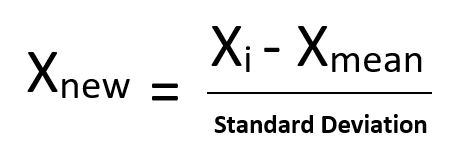

In [11]:
Image('image/standardization.jpg', width = 300)

* **정규화(Normalization)** : 서로 다른 피처의 크기를 통일하기 위해 크기를 변환해주는 개념 (즉, 개별 데이터 크기를 모두 똑같은 단위로 변경)

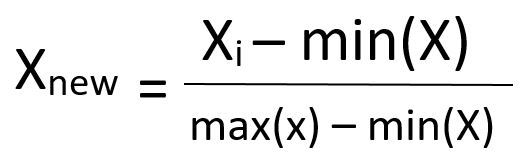

In [12]:
Image('image/min-max-normalisation.jpg', width = 300)

## (1) StandardScaler

        : 표준화를 쉽게 지원하기 위한 클래스로 개별 피처를 평균이 0, 분산이 1인 값으로 변환

*  RBF 커널을 이용하는 서포트 벡터 머신, 선형회귀, 로지스틱 회귀는 데이터가 가우시안 분포를 가지고 있다고 가정하고 구현했기 때문에, 사전에 표준화를 적용하는 것은 예측 향상에 중요한 요소

In [13]:
from sklearn.datasets import load_iris
import pandas as pd

# 붓꽃 데이터 세트 로딩하고 데이터 프레임으로 변환
iris = load_iris()
iris_data = iris.data
iris_df = pd.DataFrame(data=iris_data, columns = iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [14]:
print('feature들의 평균 값: ')
print(iris_df.mean())

print('\nfeature들의 분산 값: ')
print(iris_df.var())

feature들의 평균 값: 
sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

feature들의 분산 값: 
sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64


In [15]:
# StandardScaler를 이용하여 표준화

from sklearn.preprocessing import StandardScaler

# Scaler 객체 생성
scaler = StandardScaler()

# StandardScaler 로 데이터 세트변환, fit()과 transform() 호출
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

# transform() 변환시 스케일 변환된 데이터세트가 Numpy ndarray로 반환되 이를 데이터 프레임으로 변환
iris_df_scaled = pd.DataFrame(data= iris_scaled, columns = iris.feature_names)
iris_df_scaled.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [16]:
print('feature들의 평균값: ')
print(iris_df_scaled.mean())
print('\nfeature들의 분산값: ')
print(iris_df_scaled.var())

feature들의 평균값: 
sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64

feature들의 분산값: 
sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
dtype: float64


모든 컬럼 값의 평균이 0, 분산이 1에 아주 가깝게 변환되었음

## (2) MinMaxScaler
        : 데이터값을 0과 1사이의 범위 값으로 변환(음수값이 있으면 -1에서 1값으로 변환)
        
 * 데이터의 분포가 가우시안 분포가 아닐 경우에 적용해 볼 수 있음

In [17]:
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
scaler = MinMaxScaler()

# MinMaxScaler로 데이터 세트 변환. fit()과 transform() 호출
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

# transform()시 스케일 변환된 데이터세트가 Numpy ndarray로 변환되어 이를 DataFrame으로 변환
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns = iris.feature_names)
iris_df_scaled.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667


In [18]:
print('feature들의 최솟값: ')
print(iris_df_scaled.min())
print('\nfeature들의 최댓값: ')
print(iris_df_scaled.max())

feature들의 최솟값: 
sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
dtype: float64

feature들의 최댓값: 
sepal length (cm)    1.0
sepal width (cm)     1.0
petal length (cm)    1.0
petal width (cm)     1.0
dtype: float64
